In [1]:
%load_ext watermark

In [7]:
%watermark -v -p pandas,numpy,matplotlib

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.18.1

pandas    : 2.2.3
numpy     : 2.0.2
matplotlib: 3.9.4



In [8]:
import pandas as pd

In [16]:
df = pd.read_csv("perceptron_toydata.txt", sep="\t", header=None, names=["x1", "x2", "label"])
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-1.84,-1.13,0
...,...,...,...
95,0.71,2.27,1
96,1.96,0.83,1
97,2.52,1.83,1
98,2.77,2.82,1


In [17]:
x_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [21]:
x_train.shape

(100, 2)

In [22]:
import numpy as np

In [23]:
np.bincount(y_train)

array([50, 50])

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

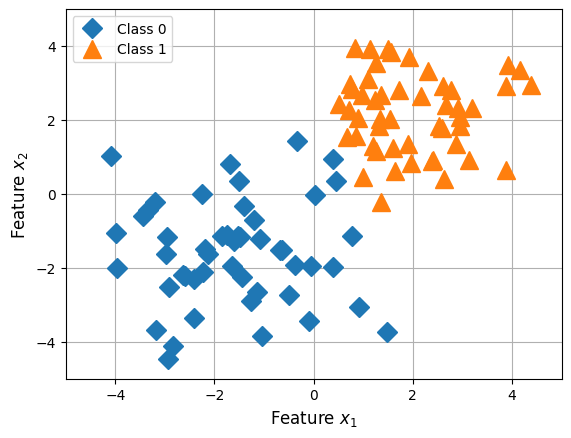

In [28]:
plt.plot(
    x_train[y_train == 0, 0], # row matches y_train == 0, col is x1
    x_train[y_train == 0, 1], # row matches y_train == 0, col is x2
    marker = "D",
    markersize = 10,
    linestyle = "",
    label = "Class 0"
)
plt.plot(
    x_train[y_train == 1, 0],
    x_train[y_train == 1, 1],
    marker = "^",
    markersize = 13,
    linestyle = "",
    label = "Class 1"
)
plt.legend(loc = 2)
plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [29]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

In [30]:
ppn = Perceptron(num_features = 2)

In [31]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0
    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

In [32]:
ppn = Perceptron(num_features = 2)

x = [1.1, 2.1]
ppn.forward(x)

0

In [55]:
import random
class Perceptron:
    def __init__(self, num_features, alpha = 1.0):
        random.seed(123)
        self.num_features = num_features
        self.weights = [random.uniform(-0.5, 0.5) for _ in range(num_features)]
        self.bias = random.uniform(-0.5, 0.5)
        self.alpha = alpha
        
    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        #update
        self.bias += (error * self.alpha)
        for i, _ in enumerate(self.weights):
            self.weights[i] += (error * x[i] * self.alpha)

        return error

In [35]:
ppn = Perceptron(num_features = 2, alpha = 0.5)

x = [1.1, 2.1]
ppn.update(x, true_y = 1)
print("Model parameters:")
print(" Weights:", ppn.weights)
print(" Bias:", ppn.bias)

Model parameters:
 Weights: [1.1, 2.1]
 Bias: 1.0


In [52]:
def train(model, all_x, all_y, epochs):
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch + 1} errors {error_count}")
        if (error_count == 0):
            return

In [56]:
ppn = Perceptron(num_features = 2, alpha = 0.5)

train(model = ppn, all_x = x_train, all_y = y_train, epochs = 10)

Epoch 1 errors 3
Epoch 2 errors 4
Epoch 3 errors 1
Epoch 4 errors 0


In [39]:
def compute_accuracy(model, all_x, all_y):
    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

In [40]:
train_acc = compute_accuracy(ppn, x_train, y_train)
train_acc

1.0

In [41]:
print(f"Accuracy: {train_acc * 100}%")

Accuracy: 100.0%


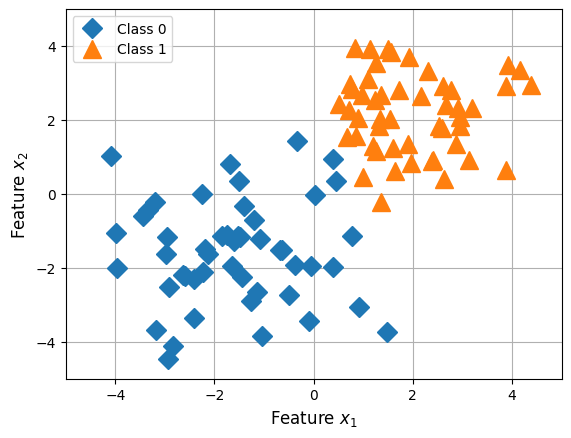

In [42]:
plt.plot(
    x_train[y_train == 0, 0], # row matches y_train == 0, col is x1
    x_train[y_train == 0, 1], # row matches y_train == 0, col is x2
    marker = "D",
    markersize = 10,
    linestyle = "",
    label = "Class 0"
)
plt.plot(
    x_train[y_train == 1, 0],
    x_train[y_train == 1, 1],
    marker = "^",
    markersize = 13,
    linestyle = "",
    label = "Class 1"
)
plt.legend(loc = 2)
plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [43]:
def plot_boundary(model):
    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) -b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) -b) / w2

    return x1_min, x1_max, x2_min, x2_max

-20 39.999999999999986 20 -35.34883720930232


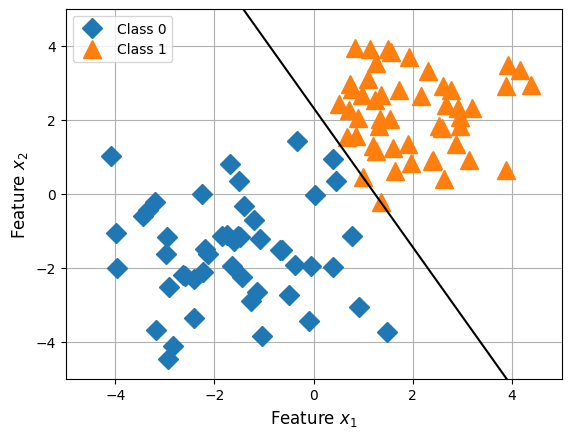

In [46]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)
print(x1_min, x2_min, x1_max, x2_max)
plt.plot(
    x_train[y_train == 0, 0], # row matches y_train == 0, col is x1
    x_train[y_train == 0, 1], # row matches y_train == 0, col is x2
    marker = "D",
    markersize = 10,
    linestyle = "",
    label = "Class 0"
)
plt.plot(
    x_train[y_train == 1, 0],
    x_train[y_train == 1, 1],
    marker = "^",
    markersize = 13,
    linestyle = "",
    label = "Class 1"
)

# plot straight line using [axis x points], [axis y points]
plt.plot([x1_min, x1_max], [x2_min, x2_max], color = "k")

plt.legend(loc = 2)
plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()